In [1]:
import numpy as np
import pandas as pd
from ete3 import Tree
import seaborn as sns

### Сопоставление видов из таблицы и 60_birds_way

In [2]:
str_tree=open("/Users/aleksandradenisova/Desktop/coursework/data/initial_data/cactus_header.txt").read()
tree = Tree(str_tree, format=1)

In [3]:
import re
tree_s = tree.write(format=9)
sp_list = re.sub('[()]', '', tree_s).split(',')
#print('\n'.join(sp_list))

In [4]:
d = {'cactus': sp_list, 'short_ID': [i.split('.')[1][3:9] for i in sp_list]}
df_1 = pd.DataFrame(d)
df_1.head()

,cactus,short_ID
0,GCA_009819545.1_rLacAgi1.alt,LacAgi
1,GCF_015237465.2_rCheMyd1.pri.v2,CheMyd
2,GCA_016128335.1_ZJU1.0,JU1
3,GCF_009769625.2_bCygOlo1.pri.v2,CygOlo
4,GCF_015476345.1_ZJU1.0,JU1


Сейчас можно сделать сопоставление для тех видов, которые тогда давал мне Оливиер, потом -- спросить, почему туда не вошли все виды, которые можно найти в NCBI. Далее -- достать все виды из NCBI и попросить Ника добавить к ним характеристики по инновационности. 

In [5]:
df = pd.read_excel("/Users/aleksandradenisova/Desktop/coursework/data/initial_data/VGL_species_w_INNO_9-26-2022.xlsx")
df['short_ID'] = df['VGL ID'].str[1:7]
df['short_ID']
df.tail()

,VGL ID,SPECIES,SPECIES.1,COMMON_NAME,FAMILY,ORDER,Songbird,SMTH,Geo_Range,TotInno_resResEff2022,RANK,TotInno_over0.5_BIN,TotInno_resResEff,FoodInno_resResEff,TechInno_resResEff,Raw_TotInno2022,Relative_Brain_size,BodyMass,short_ID
55,bCarCri1,Cariama cristata,Cariama_cristata,Red-legged_seriema,Cariamidae,Cariamiformes,0,54380,South-America,-0.443525,5.0,0.0,-0.398963,-0.273359,-0.218976,0.0,0.294615,1400.00,CarCri
56,bMelGeo1,Melospiza georgiana georgiana,Melospiza_georgiana,Swamp_sparrow,Passerellidae,Passeriformes,1,76076,several,-0.596293,4.0,0.0,-0.553518,-0.380011,-0.308416,0.0,0.151216,16.10,MelGeo
57,bSphHub1,Spheniscus humboldti,Spheniscus_humboldti,Humboldt's_penguin,Spheniscidae,Sphenisciformes,0,9240,several,-0.768566,3.0,0.0,-0.727806,-0.500279,-0.409275,0.0,0.009589,4366.39,SphHub
58,bCapEur3,Caprimulgus europaeus,Caprimulgus_europaeus,Eurasian_nightjar,Caprimulgidae,Caprimulgiformes,0,111811,several,-0.823039,2.0,0.0,-0.782916,-0.538308,-0.441167,0.0,-0.529896,67.00,CapEur
59,bAlcTor1,Alca torda,Alca_torda,razorbill,Alcidae,Charadriiformes,0,28689,several,-0.869959,1.0,0.0,-0.830385,-0.571064,-0.468637,0.0,-0.058385,725.99,AlcTor


In [6]:
#df.sort_values(by = 'RANK')['RANK']

In [7]:
df_2 = df_1.merge(df, how = 'inner')
df_2 = df_2.sort_values(by = 'TotInno_resResEff2022')

df_2['RANK'] = df_2.reset_index().index+1
df_2

,cactus,short_ID,VGL ID,SPECIES,SPECIES.1,COMMON_NAME,FAMILY,ORDER,Songbird,SMTH,Geo_Range,TotInno_resResEff2022,RANK,TotInno_over0.5_BIN,TotInno_resResEff,FoodInno_resResEff,TechInno_resResEff,Raw_TotInno2022,Relative_Brain_size,BodyMass
17,GCA_008658365.1_bAlcTor1_primary,AlcTor,bAlcTor1,Alca torda,Alca_torda,razorbill,Alcidae,Charadriiformes,0,28689,several,-0.869959,1,0.0,-0.830385,-0.571064,-0.468637,0.0,-0.058385,725.99
8,GCA_907165065.1_bCapEur3.1,CapEur,bCapEur3,Caprimulgus europaeus,Caprimulgus_europaeus,Eurasian_nightjar,Caprimulgidae,Caprimulgiformes,0,111811,several,-0.823039,2,0.0,-0.782916,-0.538308,-0.441167,0.0,-0.529896,67.00
27,GCA_009819825.1_bCarCri1.pri,CarCri,bCarCri1,Cariama cristata,Cariama_cristata,Red-legged_seriema,Cariamidae,Cariamiformes,0,54380,South-America,-0.443525,3,0.0,-0.398963,-0.273359,-0.218976,0.0,0.294615,1400.00
19,GCA_017639555.1_bCicMag1.pri,CicMag,bCicMag1,Ciconia maguari,Ciconia_maguari,maguari_stork,Ciconiidae,Ciconiiformes,0,52777,several,-0.436442,4,0.0,-0.391797,-0.268414,-0.214829,0.0,0.247232,3994.99
15,GCA_020800305.1_bPorHoc1.mat.Z.cur,PorHoc,bPorHoc1,Porphyrio hochstetteri,Porphyrio_hochstetteri,South_Island_takahe,Rallidae,Gruiformes,0,439704,Australasia,-0.412970,5,0.0,-0.368051,-0.252028,-0.201087,0.0,-0.309640,2462.18
23,GCA_009769605.1_bBucAby1.pri,BucAby,bBucAby1,Bucorvus abyssinicus,Bucorvus_abyssinicus,Abyssinian_ground-hornbill,Bucorvidae,Bucerotiformes,0,153643,Africa,-0.385209,6,0.0,-0.339965,-0.232647,-0.184834,0.0,0.457319,4000.00
33,GCF_009829145.1_bChiLan1.pri,ChiLan,bChiLan1,Chiroxiphia lanceolata,Chiroxiphia_lanceolata,lance-tailed_manakin,Pipridae,Passeriformes,0,296741,several,-0.351232,7,0.0,-0.305591,-0.208927,-0.164942,0.0,NaN,18.50
41,GCF_003957565.2_bTaeGut1.4.pri,TaeGut,bTaeGut1,Taeniopygia guttata,Taeniopygia_guttata,zebra_finch,Estrildidae,Passeriformes,1,59729,Australasia,-0.312239,8,0.0,-0.274248,0.027538,-0.547924,1.0,-0.254380,NaN
9,GCA_013368605.1_bNycGra1.pri,NycGra,bNycGra1,Nyctibius grandis,Nyctibius_grandis,great_potoo,Nyctibiidae,Caprimulgiformes,0,48427,several,-0.307428,9,0.0,-0.261274,-0.178346,-0.139296,0.0,NaN,547.00
4,GCA_009769525.1_bPteGut1.pri,PteGut,bPteGut1,Pterocles gutturalis,Pterocles_gutturalis,yellow-throated_sandgrouse,Pteroclidae,Pterocliformes,0,240206,Africa,-0.289494,10,0.0,-0.243130,-0.165826,-0.128796,0.0,-0.954671,338.00


In [81]:
sps = """GCF_003957565.2_bTaeGut1.4.pri,GCA_009764595.1_bGeoTri1.pri,GCA_008658365.1_bAlcTor1_primary,GCA_009819605.1_bSteHir1.pri,GCA_009819655.1_bSylAtr1.pri,GCA_014839755.1_bSylBor1.pri,GCA_009769605.1_bBucAby1.pri,GCF_900496995.4_bAquChr1.4""".split(',')

sps_noninno = ['GCF_003957565.2_bTaeGut1.4.pri',
 'GCA_008658365.1_bAlcTor1_primary',
 'GCA_014839755.1_bSylBor1.pri',
 'GCA_009769605.1_bBucAby1.pri']

df_2['type'] = df_2['cactus'].apply(lambda x: 'other' if x not in sps 
                                    else ('non-innovative' if x in sps_noninno else 'innovative'))


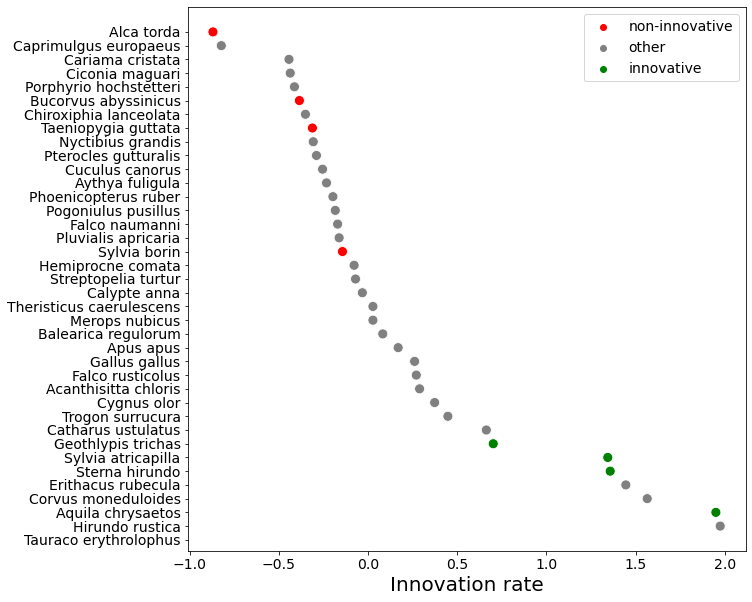

In [91]:
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 14})
g = sns.scatterplot(data=df_2,
                x='TotInno_resResEff2022', y="SPECIES", hue = 'type', s=100, palette = ['red','gray','green'])

plt.xlabel('Innovation rate',  fontsize=20)
plt.ylabel('')
plt.legend([],[], frameon=False, prop = { "size": 25})
plt.legend()
plt.show()


In [8]:
from matplotlib import pyplot as plt
sps = """GCF_003957565.2_bTaeGut1.4.pri,GCA_009764595.1_bGeoTri1.pri,GCA_008658365.1_bAlcTor1_primary,GCA_009819605.1_bSteHir1.pri,GCA_009819655.1_bSylAtr1.pri,GCA_014839755.1_bSylBor1.pri,GCA_009769605.1_bBucAby1.pri,GCF_900496995.4_bAquChr1.4""".split(',')
sps

def chack(x):
    return x in sps

df_plot = df_2[df_2['cactus'].apply(lambda x: chack(x))].reset_index()
df_plot

,index,cactus,short_ID,VGL ID,SPECIES,SPECIES.1,COMMON_NAME,FAMILY,ORDER,Songbird,...,Geo_Range,TotInno_resResEff2022,RANK,TotInno_over0.5_BIN,TotInno_resResEff,FoodInno_resResEff,TechInno_resResEff,Raw_TotInno2022,Relative_Brain_size,BodyMass
0,17,GCA_008658365.1_bAlcTor1_primary,AlcTor,bAlcTor1,Alca torda,Alca_torda,razorbill,Alcidae,Charadriiformes,0,...,several,-0.869959,1,0.0,-0.830385,-0.571064,-0.468637,0.0,-0.058385,725.99
1,23,GCA_009769605.1_bBucAby1.pri,BucAby,bBucAby1,Bucorvus abyssinicus,Bucorvus_abyssinicus,Abyssinian_ground-hornbill,Bucorvidae,Bucerotiformes,0,...,Africa,-0.385209,6,0.0,-0.339965,-0.232647,-0.184834,0.0,0.457319,4000.00
2,41,GCF_003957565.2_bTaeGut1.4.pri,TaeGut,bTaeGut1,Taeniopygia guttata,Taeniopygia_guttata,zebra_finch,Estrildidae,Passeriformes,1,...,Australasia,-0.312239,8,0.0,-0.274248,0.027538,-0.547924,1.0,-0.254380,NaN
3,38,GCA_014839755.1_bSylBor1.pri,SylBor,bSylBor1,Sylvia borin,Sylvia_borin,garden_warbler,Sylviidae,Passeriformes,1,...,several,-0.143569,17,0.0,-0.103606,0.145291,-0.449175,1.0,-0.117805,18.20
4,42,GCA_009764595.1_bGeoTri1.pri,GeoTri,bGeoTri1,Geothlypis trichas,Geothlypis_trichas,common_yellowthroat,Parulidae,Passeriformes,1,...,several,0.701918,32,1.0,0.455981,0.251643,0.333162,3.0,0.061571,9.54
5,37,GCA_009819655.1_bSylAtr1.pri,SylAtr,bSylAtr1,Sylvia atricapilla,Sylvia_atricapilla,blackcap,Sylviidae,Passeriformes,1,...,several,1.344205,33,1.0,1.277385,1.564432,-0.520404,9.0,-0.132966,16.70
6,18,GCA_009819605.1_bSteHir1.pri,SteHir,bSteHir1,Sterna hirundo,Sterna_hirundo,Common_tern,Laridae,Charadriiformes,0,...,several,1.357739,34,1.0,1.770017,1.389559,1.628944,10.0,-0.182567,129.15
7,21,GCF_900496995.4_bAquChr1.4,AquChr,bAquChr1,Aquila chrysaetos,Aquila_chrysaetos,golden_eagle,Accipitridae,Falconiformes,0,...,several,1.950304,37,1.0,1.987827,1.945494,1.374543,19.0,0.134312,4247.97


In [9]:
a = """Гагарка (Alca torda)
Абиссинский рогатый ворон (Bucorvus abyssinicus)
Зебровая амадина (Taeniopygia guttata)
Садовая славка (Sylvia borin)
Жертогорлый певун (Geothlypis trichas)
Черноголовая славка (Sylvia atricapilla)
Речная крачка (Sterna hirundo)
Беркут (Aquila chrysaetos)
""".split('\n')


In [10]:
df_plot['Species'] = pd.Series(a)

In [11]:
df_plot['Innovation ranks'] = df_plot['RANK']

In [12]:
df_plot

,index,cactus,short_ID,VGL ID,SPECIES,SPECIES.1,COMMON_NAME,FAMILY,ORDER,Songbird,...,RANK,TotInno_over0.5_BIN,TotInno_resResEff,FoodInno_resResEff,TechInno_resResEff,Raw_TotInno2022,Relative_Brain_size,BodyMass,Species,Innovation ranks
0,17,GCA_008658365.1_bAlcTor1_primary,AlcTor,bAlcTor1,Alca torda,Alca_torda,razorbill,Alcidae,Charadriiformes,0,...,1,0.0,-0.830385,-0.571064,-0.468637,0.0,-0.058385,725.99,Гагарка (Alca torda),1
1,23,GCA_009769605.1_bBucAby1.pri,BucAby,bBucAby1,Bucorvus abyssinicus,Bucorvus_abyssinicus,Abyssinian_ground-hornbill,Bucorvidae,Bucerotiformes,0,...,6,0.0,-0.339965,-0.232647,-0.184834,0.0,0.457319,4000.00,Абиссинский рогатый ворон (Bucorvus abyssinicus),6
2,41,GCF_003957565.2_bTaeGut1.4.pri,TaeGut,bTaeGut1,Taeniopygia guttata,Taeniopygia_guttata,zebra_finch,Estrildidae,Passeriformes,1,...,8,0.0,-0.274248,0.027538,-0.547924,1.0,-0.254380,NaN,Зебровая амадина (Taeniopygia guttata),8
3,38,GCA_014839755.1_bSylBor1.pri,SylBor,bSylBor1,Sylvia borin,Sylvia_borin,garden_warbler,Sylviidae,Passeriformes,1,...,17,0.0,-0.103606,0.145291,-0.449175,1.0,-0.117805,18.20,Садовая славка (Sylvia borin),17
4,42,GCA_009764595.1_bGeoTri1.pri,GeoTri,bGeoTri1,Geothlypis trichas,Geothlypis_trichas,common_yellowthroat,Parulidae,Passeriformes,1,...,32,1.0,0.455981,0.251643,0.333162,3.0,0.061571,9.54,Жертогорлый певун (Geothlypis trichas),32
5,37,GCA_009819655.1_bSylAtr1.pri,SylAtr,bSylAtr1,Sylvia atricapilla,Sylvia_atricapilla,blackcap,Sylviidae,Passeriformes,1,...,33,1.0,1.277385,1.564432,-0.520404,9.0,-0.132966,16.70,Черноголовая славка (Sylvia atricapilla),33
6,18,GCA_009819605.1_bSteHir1.pri,SteHir,bSteHir1,Sterna hirundo,Sterna_hirundo,Common_tern,Laridae,Charadriiformes,0,...,34,1.0,1.770017,1.389559,1.628944,10.0,-0.182567,129.15,Речная крачка (Sterna hirundo),34
7,21,GCF_900496995.4_bAquChr1.4,AquChr,bAquChr1,Aquila chrysaetos,Aquila_chrysaetos,golden_eagle,Accipitridae,Falconiformes,0,...,37,1.0,1.987827,1.945494,1.374543,19.0,0.134312,4247.97,Беркут (Aquila chrysaetos),37


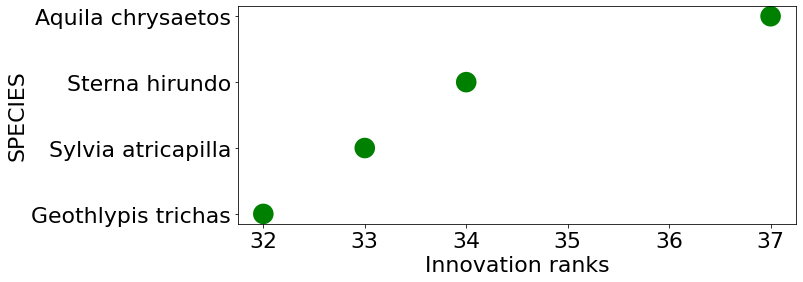

In [13]:
df_plot[' '] = df_plot['TotInno_over0.5_BIN'].apply(lambda x: 'non-innovative' if x==0 else 'innovative')

df_plot_new = df_plot.sort_values(by='Innovation ranks',ascending=False)


plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size': 22})
sns.scatterplot(data=df_plot_new[df_plot_new[' ']=='innovative'],
                x='Innovation ranks', y="SPECIES", hue = ' ',s=500, palette=["g"])
plt.legend([],[], frameon=False)

plt.show()

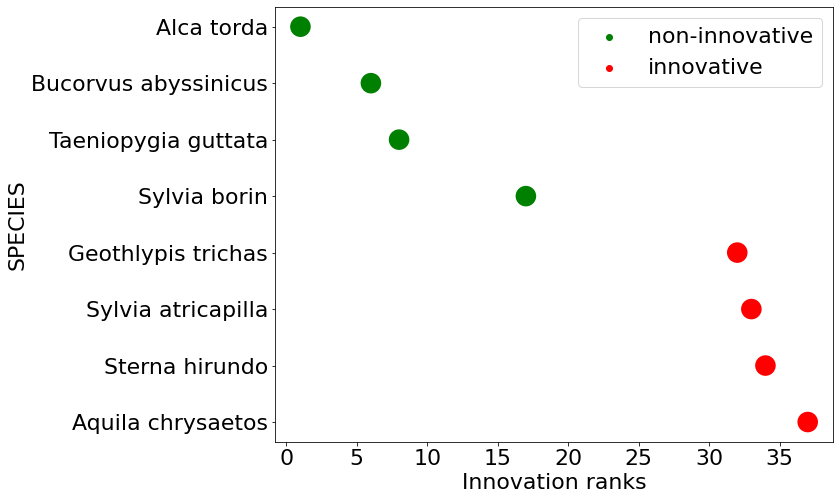

In [15]:

df_plot[' '] = df_plot['TotInno_over0.5_BIN'].apply(lambda x: 'non-innovative' if x==0 else 'innovative')

df_plot_new = df_plot.sort_values(by='Innovation ranks',ascending=False)


plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})
sns.scatterplot(data=df_plot,
                x='Innovation ranks', y="SPECIES", hue = ' ',s=500, palette=["g", "r"])
plt.legend([],[], frameon=False)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})
sns.scatterplot(data=df_plot_new,
                x='Innovation ranks', y="SPECIES", hue = ' ',s=500, palette=["g", "r"])
plt.legend([],[], frameon=False)
plt.legend()
plt.show()

#### Соответственно информации с сайта проекта https://vgp.github.io/genomeark/ для каждого вида запишем, собраны ли все необходимые для сборки данные, есть ли курированная сборка, есть ли сборка митохондриального генома

In [17]:
!pip install beautifulsoup4 
!pip install requests

In [18]:
from bs4 import BeautifulSoup
import requests

url = "https://vgp.github.io/genomeark/"
page = requests.get(url)
print(page.status_code)

200


In [19]:
soup = BeautifulSoup(page.text, 'html.parser')
soup

<!DOCTYPE html>

<meta charset="utf-8"/>
<title>Redirecting to https://genomeark.github.io/</title>
<meta content="0; URL=https://genomeark.github.io/" http-equiv="refresh"/>
<link href="https://genomeark.github.io/" rel="canonical"/>
<body style="text-align: center">
Redirecting to <a href="https://genomeark.github.io/">https://genomeark.github.io/</a>
</body>

In [20]:
blocks_with_info = soup.find_all("div", {"class": "species-listing"})
list_with_empty = [i.get_text().split('\n') for i in blocks_with_info]
list_no_empty = dict()
for listik in list_with_empty:
    lis = [i for i in listik if i.strip()]
    if len(lis)<5:
        lis.append('NO')
    
    list_no_empty[lis[0]] = lis[1:]
    
list_no_empty

{}

#### Аннотируем виды, которые есть в vgp_birds_60way (http://public.gi.ucsc.edu/~hickey/birds/)

In [21]:
def augment(x, n):
    try:
        return list_no_empty[x][n]
    except:
        return 'No data'
    
df_2['data'] = df_2['SPECIES'].apply(lambda x: augment(x, 1))
df_2['assembly'] = df_2['SPECIES'].apply(lambda x: augment(x, 2))
df_2['mito assembly'] = df_2['SPECIES'].apply(lambda x: augment(x, 3))
df_2.to_excel("/Users/aleksandradenisova/Desktop/coursework/data/initial_data/vgp_birds_60way_INNO.xlsx")

In [22]:
df_2

,cactus,short_ID,VGL ID,SPECIES,SPECIES.1,COMMON_NAME,FAMILY,ORDER,Songbird,SMTH,...,TotInno_over0.5_BIN,TotInno_resResEff,FoodInno_resResEff,TechInno_resResEff,Raw_TotInno2022,Relative_Brain_size,BodyMass,data,assembly,mito assembly
17,GCA_008658365.1_bAlcTor1_primary,AlcTor,bAlcTor1,Alca torda,Alca_torda,razorbill,Alcidae,Charadriiformes,0,28689,...,0.0,-0.830385,-0.571064,-0.468637,0.0,-0.058385,725.99,No data,No data,No data
8,GCA_907165065.1_bCapEur3.1,CapEur,bCapEur3,Caprimulgus europaeus,Caprimulgus_europaeus,Eurasian_nightjar,Caprimulgidae,Caprimulgiformes,0,111811,...,0.0,-0.782916,-0.538308,-0.441167,0.0,-0.529896,67.00,No data,No data,No data
27,GCA_009819825.1_bCarCri1.pri,CarCri,bCarCri1,Cariama cristata,Cariama_cristata,Red-legged_seriema,Cariamidae,Cariamiformes,0,54380,...,0.0,-0.398963,-0.273359,-0.218976,0.0,0.294615,1400.00,No data,No data,No data
19,GCA_017639555.1_bCicMag1.pri,CicMag,bCicMag1,Ciconia maguari,Ciconia_maguari,maguari_stork,Ciconiidae,Ciconiiformes,0,52777,...,0.0,-0.391797,-0.268414,-0.214829,0.0,0.247232,3994.99,No data,No data,No data
15,GCA_020800305.1_bPorHoc1.mat.Z.cur,PorHoc,bPorHoc1,Porphyrio hochstetteri,Porphyrio_hochstetteri,South_Island_takahe,Rallidae,Gruiformes,0,439704,...,0.0,-0.368051,-0.252028,-0.201087,0.0,-0.309640,2462.18,No data,No data,No data
23,GCA_009769605.1_bBucAby1.pri,BucAby,bBucAby1,Bucorvus abyssinicus,Bucorvus_abyssinicus,Abyssinian_ground-hornbill,Bucorvidae,Bucerotiformes,0,153643,...,0.0,-0.339965,-0.232647,-0.184834,0.0,0.457319,4000.00,No data,No data,No data
33,GCF_009829145.1_bChiLan1.pri,ChiLan,bChiLan1,Chiroxiphia lanceolata,Chiroxiphia_lanceolata,lance-tailed_manakin,Pipridae,Passeriformes,0,296741,...,0.0,-0.305591,-0.208927,-0.164942,0.0,NaN,18.50,No data,No data,No data
41,GCF_003957565.2_bTaeGut1.4.pri,TaeGut,bTaeGut1,Taeniopygia guttata,Taeniopygia_guttata,zebra_finch,Estrildidae,Passeriformes,1,59729,...,0.0,-0.274248,0.027538,-0.547924,1.0,-0.254380,NaN,No data,No data,No data
9,GCA_013368605.1_bNycGra1.pri,NycGra,bNycGra1,Nyctibius grandis,Nyctibius_grandis,great_potoo,Nyctibiidae,Caprimulgiformes,0,48427,...,0.0,-0.261274,-0.178346,-0.139296,0.0,NaN,547.00,No data,No data,No data
4,GCA_009769525.1_bPteGut1.pri,PteGut,bPteGut1,Pterocles gutturalis,Pterocles_gutturalis,yellow-throated_sandgrouse,Pteroclidae,Pterocliformes,0,240206,...,0.0,-0.243130,-0.165826,-0.128796,0.0,-0.954671,338.00,No data,No data,No data


#### Сохраню виды с их коэффициентом инновационности

In [23]:
df_sorted_inno = df_2.sort_values(by = 'TotInno_resResEff2022', ascending=False)[['TotInno_resResEff2022',
                                                                                  'VGL ID']].dropna()
df_sorted_inno.to_csv('/Users/aleksandradenisova/Desktop/coursework/data/stage3/sorted_inno_sp.csv', index = False)

#### Аннотируем виды, которые каким-то образом секвенированы в лаборатории

In [24]:
df['data'] = df['SPECIES'].apply(lambda x: augment(x, 1))
df['assembly'] = df['SPECIES'].apply(lambda x: augment(x, 2))
df['mito assembly'] = df['SPECIES'].apply(lambda x: augment(x, 3))
#df.to_excel("/Users/aleksandradenisova/Desktop/coursework/data/initial_data/VGL_species_w_INNO_9-26-2022_new.xlsx")

#### Попробуем среди видов, которые есть в vgp_birds_60way и для которых есть хорошие геномы выбрать те, на которые можно было бы смотреть с точки зрения инновационности

In [25]:
df_3 = df_2[(df_2['assembly']=='curated assembly') & np.isnan(df_2['RANK'])==False]

In [26]:
#df_2.sort_values(by = 'RANK')['RANK']

In [27]:
#df_3['SPECIES_RANK'] = 
df_3 = df_3.sort_values(by = 'RANK').reset_index(drop=True)
df_3['RANK'] = df_3.index+1
df_3['SPECIES_R'] = df_3['SPECIES'].astype(str) +', ' + df_3['RANK'].dropna().astype(int).astype(str)

df_3 = df_3[~df_3['TotInno_resResEff'].isna()]

df_3['TotInno_resResEff'] = df_3['TotInno_resResEff'].apply(lambda x: round(x, 3))

df_3['nucl'] = np.random.choice(['A','T','G','C'], df_3.shape[0])
df_3['nucl'] = df_3['nucl'].astype(str) + ':  ' + df_3['TotInno_resResEff'].astype(str)

# names_list = df_3[['cactus', 'SPECIES']].set_index('cactus').to_dict()['SPECIES_R']
names_list = df_3[['nucl', 'TotInno_resResEff', 'cactus']].set_index('cactus').to_dict()['nucl']

In [28]:
df_3.columns

Index(['cactus', 'short_ID', 'VGL ID', 'SPECIES', 'SPECIES.1', 'COMMON_NAME',
       'FAMILY', 'ORDER', 'Songbird', 'SMTH', 'Geo_Range',
       'TotInno_resResEff2022', 'RANK', 'TotInno_over0.5_BIN',
       'TotInno_resResEff', 'FoodInno_resResEff', 'TechInno_resResEff',
       'Raw_TotInno2022', 'Relative_Brain_size', 'BodyMass', 'data',
       'assembly', 'mito assembly', 'SPECIES_R', 'nucl'],
      dtype='object')

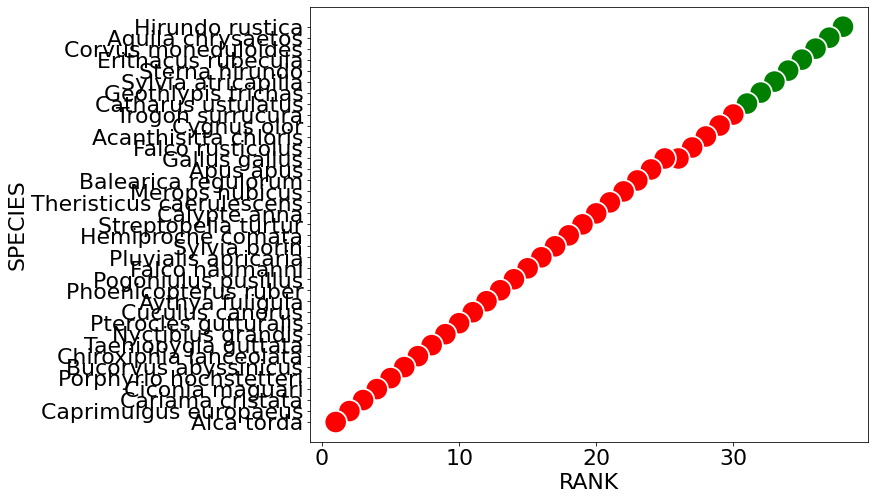

In [29]:
df_3[' '] = df_3['TotInno_over0.5_BIN'].apply(lambda x: 'non-innovative' if x==0 else 'innovative')



plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 22})
sns.scatterplot(data=df_3.sort_values(by='RANK',ascending=False),
                x='RANK', y="SPECIES", hue = ' ',s=500, palette=["g", "r"])
plt.legend([],[], frameon=False)
plt.show()

In [30]:
colors = dict()
n=650000
df_4 = df_3.sort_values(by = 'RANK')
for i in df_4[df_4['TotInno_over0.5_BIN']==0]['SPECIES']:
#    n+=1
    colors[i] = 'red'
    
n=10090
for i in df_4[df_4['TotInno_over0.5_BIN']==1]['SPECIES']:
    n+=1
    colors[i] = 'green'
    
colors

{'Alca torda': 'red',
 'Caprimulgus europaeus': 'red',
 'Cariama cristata': 'red',
 'Ciconia maguari': 'red',
 'Porphyrio hochstetteri': 'red',
 'Bucorvus abyssinicus': 'red',
 'Chiroxiphia lanceolata': 'red',
 'Taeniopygia guttata': 'red',
 'Nyctibius grandis': 'red',
 'Pterocles gutturalis': 'red',
 'Cuculus canorus': 'red',
 'Aythya fuligula': 'red',
 'Phoenicopterus ruber': 'red',
 'Pogoniulus pusillus': 'red',
 'Falco naumanni': 'red',
 'Pluvialis apricaria': 'red',
 'Sylvia borin': 'red',
 'Hemiprocne comata': 'red',
 'Streptopelia turtur': 'red',
 'Calypte anna': 'red',
 'Theristicus caerulescens': 'red',
 'Merops nubicus': 'red',
 'Balearica regulorum': 'red',
 'Apus apus': 'red',
 'Gallus gallus': 'red',
 'Falco rusticolus': 'red',
 'Acanthisitta chloris': 'red',
 'Cygnus olor': 'red',
 'Trogon surrucura': 'red',
 'Catharus ustulatus': 'green',
 'Geothlypis trichas': 'green',
 'Sylvia atricapilla': 'green',
 'Sterna hirundo': 'green',
 'Erithacus rubecula': 'green',
 'Corvus m

In [31]:
df_4

,cactus,short_ID,VGL ID,SPECIES,SPECIES.1,COMMON_NAME,FAMILY,ORDER,Songbird,SMTH,...,TechInno_resResEff,Raw_TotInno2022,Relative_Brain_size,BodyMass,data,assembly,mito assembly,SPECIES_R,nucl,
0,GCA_008658365.1_bAlcTor1_primary,AlcTor,bAlcTor1,Alca torda,Alca_torda,razorbill,Alcidae,Charadriiformes,0,28689,...,-0.468637,0.0,-0.058385,725.99,No data,No data,No data,"Alca torda, 1",G: -0.83,non-innovative
1,GCA_907165065.1_bCapEur3.1,CapEur,bCapEur3,Caprimulgus europaeus,Caprimulgus_europaeus,Eurasian_nightjar,Caprimulgidae,Caprimulgiformes,0,111811,...,-0.441167,0.0,-0.529896,67.00,No data,No data,No data,"Caprimulgus europaeus, 2",A: -0.783,non-innovative
2,GCA_009819825.1_bCarCri1.pri,CarCri,bCarCri1,Cariama cristata,Cariama_cristata,Red-legged_seriema,Cariamidae,Cariamiformes,0,54380,...,-0.218976,0.0,0.294615,1400.00,No data,No data,No data,"Cariama cristata, 3",C: -0.399,non-innovative
3,GCA_017639555.1_bCicMag1.pri,CicMag,bCicMag1,Ciconia maguari,Ciconia_maguari,maguari_stork,Ciconiidae,Ciconiiformes,0,52777,...,-0.214829,0.0,0.247232,3994.99,No data,No data,No data,"Ciconia maguari, 4",C: -0.392,non-innovative
4,GCA_020800305.1_bPorHoc1.mat.Z.cur,PorHoc,bPorHoc1,Porphyrio hochstetteri,Porphyrio_hochstetteri,South_Island_takahe,Rallidae,Gruiformes,0,439704,...,-0.201087,0.0,-0.309640,2462.18,No data,No data,No data,"Porphyrio hochstetteri, 5",T: -0.368,non-innovative
5,GCA_009769605.1_bBucAby1.pri,BucAby,bBucAby1,Bucorvus abyssinicus,Bucorvus_abyssinicus,Abyssinian_ground-hornbill,Bucorvidae,Bucerotiformes,0,153643,...,-0.184834,0.0,0.457319,4000.00,No data,No data,No data,"Bucorvus abyssinicus, 6",G: -0.34,non-innovative
6,GCF_009829145.1_bChiLan1.pri,ChiLan,bChiLan1,Chiroxiphia lanceolata,Chiroxiphia_lanceolata,lance-tailed_manakin,Pipridae,Passeriformes,0,296741,...,-0.164942,0.0,NaN,18.50,No data,No data,No data,"Chiroxiphia lanceolata, 7",C: -0.306,non-innovative
7,GCF_003957565.2_bTaeGut1.4.pri,TaeGut,bTaeGut1,Taeniopygia guttata,Taeniopygia_guttata,zebra_finch,Estrildidae,Passeriformes,1,59729,...,-0.547924,1.0,-0.254380,NaN,No data,No data,No data,"Taeniopygia guttata, 8",T: -0.274,non-innovative
8,GCA_013368605.1_bNycGra1.pri,NycGra,bNycGra1,Nyctibius grandis,Nyctibius_grandis,great_potoo,Nyctibiidae,Caprimulgiformes,0,48427,...,-0.139296,0.0,NaN,547.00,No data,No data,No data,"Nyctibius grandis, 9",G: -0.261,non-innovative
9,GCA_009769525.1_bPteGut1.pri,PteGut,bPteGut1,Pterocles gutturalis,Pterocles_gutturalis,yellow-throated_sandgrouse,Pteroclidae,Pterocliformes,0,240206,...,-0.128796,0.0,-0.954671,338.00,No data,No data,No data,"Pterocles gutturalis, 10",C: -0.243,non-innovative


In [32]:
[i.split('.')[1] for i in df_4[df_4['TotInno_over0.5_BIN']==0]['cactus'].to_list()]

['1_bAlcTor1_primary',
 '1_bCapEur3',
 '1_bCarCri1',
 '1_bCicMag1',
 '1_bPorHoc1',
 '1_bBucAby1',
 '1_bChiLan1',
 '2_bTaeGut1',
 '1_bNycGra1',
 '1_bPteGut1',
 '1_bCucCan1',
 '1_bAytFul2',
 '1_bPhoRub2',
 '1_bPogPus1',
 '2_bFalNau1',
 '1_bPluApr1',
 '1_bSylBor1',
 '1_bHemCom1',
 '2_bStrTur1',
 '1_bCalAnn1_v1',
 '1_bTheCae1',
 '1_bMerNub1',
 '1_bBalReg1',
 '1_bApuApu2',
 '1_bGalGal1',
 '2_bGalGal1',
 '1_bFalRus1',
 '1_bAcaChl1',
 '2_bCygOlo1',
 '1_bTroSur1']

In [33]:
str_tree

'(GCA_009819545.1_rLacAgi1.alt:0.327419,(GCF_015237465.2_rCheMyd1.pri.v2:0.303441,(GCA_016128335.1_ZJU1.0:0.133395,(((GCF_009769625.2_bCygOlo1.pri\n.v2:0.0278337,(GCF_015476345.1_ZJU1.0:0.0126462,GCF_009819795.1_bAytFul2.pri:0.0132034)BirdsAnc14:0.0288954)BirdsAnc06:0.0708192,(GCA_905368555.1_MGAL_\nWU_HG_1.0:0.0530885,(GCF_000002315.5_GalGal6:0.0017373,(GCF_016699485.2_bGalGal1.mat.broiler.GRCg7b:0.00246433,GCF_016700215.1_bGalGal1.pat.whiteleghor\nnlayer.GRCg7w:0.00219257)BirdsAnc21:0.000942839)BirdsAnc15:0.0441221)BirdsAnc07:0.124382)BirdsAnc04:0.0478897,((GCA_009769525.1_bPteGut1.pri:0.092264,G\nCA_901699155.2_bStrTur1.1:0.108404)BirdsAnc08:0.00555256,(GCA_017976375.1_bCucCan1.pri:0.131544,GCA_009769465.1_bTauEry1.pri:0.0829968)BirdsAnc09:0.010\n2084,(GCA_907165065.1_bCapEur3.1:0.0968465,(GCA_013368605.1_bNycGra1.pri:0.0653372,(GCF_003957555.1_bCalAnn1_v1.p:0.132457,(GCA_020740795.1_bApuApu2.pr\ni.cur:0.0645485,GCA_020745705.1_bHemCom1.pri.cur:0.0471023)BirdsAnc27:0.0394986)BirdsAn

In [34]:
names_list

{'GCA_008658365.1_bAlcTor1_primary': 'G:  -0.83',
 'GCA_907165065.1_bCapEur3.1': 'A:  -0.783',
 'GCA_009819825.1_bCarCri1.pri': 'C:  -0.399',
 'GCA_017639555.1_bCicMag1.pri': 'C:  -0.392',
 'GCA_020800305.1_bPorHoc1.mat.Z.cur': 'T:  -0.368',
 'GCA_009769605.1_bBucAby1.pri': 'G:  -0.34',
 'GCF_009829145.1_bChiLan1.pri': 'C:  -0.306',
 'GCF_003957565.2_bTaeGut1.4.pri': 'T:  -0.274',
 'GCA_013368605.1_bNycGra1.pri': 'G:  -0.261',
 'GCA_009769525.1_bPteGut1.pri': 'C:  -0.243',
 'GCA_017976375.1_bCucCan1.pri': 'C:  -0.217',
 'GCF_009819795.1_bAytFul2.pri': 'A:  0.211',
 'GCA_009819775.1_bPhoRub2.pri': 'C:  0.248',
 'GCA_015220805.1_bPogPus1.pri': 'T:  -0.136',
 'GCF_017639655.2_bFalNau1.pat': 'A:  -0.131',
 'GCA_017639485.1_bPluApr1.pri': 'T:  -0.123',
 'GCA_014839755.1_bSylBor1.pri': 'C:  -0.104',
 'GCA_020745705.1_bHemCom1.pri.cur': 'T:  -0.03',
 'GCA_901699155.2_bStrTur1.1': 'A:  -0.03',
 'GCF_003957555.1_bCalAnn1_v1.p': 'C:  0.009',
 'GCA_020745775.1_bTheCae1.pri.cur': 'T:  0.077',
 'GC

In [35]:
str_tree

'(GCA_009819545.1_rLacAgi1.alt:0.327419,(GCF_015237465.2_rCheMyd1.pri.v2:0.303441,(GCA_016128335.1_ZJU1.0:0.133395,(((GCF_009769625.2_bCygOlo1.pri\n.v2:0.0278337,(GCF_015476345.1_ZJU1.0:0.0126462,GCF_009819795.1_bAytFul2.pri:0.0132034)BirdsAnc14:0.0288954)BirdsAnc06:0.0708192,(GCA_905368555.1_MGAL_\nWU_HG_1.0:0.0530885,(GCF_000002315.5_GalGal6:0.0017373,(GCF_016699485.2_bGalGal1.mat.broiler.GRCg7b:0.00246433,GCF_016700215.1_bGalGal1.pat.whiteleghor\nnlayer.GRCg7w:0.00219257)BirdsAnc21:0.000942839)BirdsAnc15:0.0441221)BirdsAnc07:0.124382)BirdsAnc04:0.0478897,((GCA_009769525.1_bPteGut1.pri:0.092264,G\nCA_901699155.2_bStrTur1.1:0.108404)BirdsAnc08:0.00555256,(GCA_017976375.1_bCucCan1.pri:0.131544,GCA_009769465.1_bTauEry1.pri:0.0829968)BirdsAnc09:0.010\n2084,(GCA_907165065.1_bCapEur3.1:0.0968465,(GCA_013368605.1_bNycGra1.pri:0.0653372,(GCF_003957555.1_bCalAnn1_v1.p:0.132457,(GCA_020740795.1_bApuApu2.pr\ni.cur:0.0645485,GCA_020745705.1_bHemCom1.pri.cur:0.0471023)BirdsAnc27:0.0394986)BirdsAn

In [36]:
list(sps)

['GCF_003957565.2_bTaeGut1.4.pri',
 'GCA_009764595.1_bGeoTri1.pri',
 'GCA_008658365.1_bAlcTor1_primary',
 'GCA_009819605.1_bSteHir1.pri',
 'GCA_009819655.1_bSylAtr1.pri',
 'GCA_014839755.1_bSylBor1.pri',
 'GCA_009769605.1_bBucAby1.pri',
 'GCF_900496995.4_bAquChr1.4']

red
green
green
red
green
red
red
green


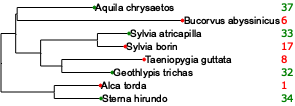

In [57]:
from ete3 import TreeStyle, TextFace, AttrFace, NodeStyle

sps = """GCF_003957565.2_bTaeGut1.4.pri,GCA_009764595.1_bGeoTri1.pri,GCA_008658365.1_bAlcTor1_primary,GCA_009819605.1_bSteHir1.pri,GCA_009819655.1_bSylAtr1.pri,GCA_014839755.1_bSylBor1.pri,GCA_009769605.1_bBucAby1.pri,GCF_900496995.4_bAquChr1.4""".split(',')
tree = Tree(str_tree, format=1)
tree.prune(list(sps))#df_3['cactus'].to_list())

str_tree=open("/Users/aleksandradenisova/Desktop/coursework/data/initial_data/cactus_header.txt").read()
#tree = Tree(str_tree, format=1)




#tree.prune(list(colors.keys()))#df_3['cactus'].to_list())

ts=TreeStyle()


for l in tree.traverse():
    l.img_style['size'] = 0
    if l.is_leaf():
        
        name = df_3[df_3['cactus']==l.name]['SPECIES'].item()
        
        color = colors.get(name, None)
        print(colors[name])
        if color:
            l.add_face(TextFace(df_3[df_3['cactus']==l.name]['RANK'].item(),#names_list[l.name], 
                                fgcolor = colors[name]), 1, position='aligned')
            ns = NodeStyle()
            ns["fgcolor"] = colors[name]
            l.img_style = ns
        l.name = name


ts = TreeStyle()
ts.show_scale = False
tree.show(tree_style=ts)
tree.render("%%inline", tree_style=ts)

32

In [38]:
colors

{'Alca torda': 'red',
 'Caprimulgus europaeus': 'red',
 'Cariama cristata': 'red',
 'Ciconia maguari': 'red',
 'Porphyrio hochstetteri': 'red',
 'Bucorvus abyssinicus': 'red',
 'Chiroxiphia lanceolata': 'red',
 'Taeniopygia guttata': 'red',
 'Nyctibius grandis': 'red',
 'Pterocles gutturalis': 'red',
 'Cuculus canorus': 'red',
 'Aythya fuligula': 'red',
 'Phoenicopterus ruber': 'red',
 'Pogoniulus pusillus': 'red',
 'Falco naumanni': 'red',
 'Pluvialis apricaria': 'red',
 'Sylvia borin': 'red',
 'Hemiprocne comata': 'red',
 'Streptopelia turtur': 'red',
 'Calypte anna': 'red',
 'Theristicus caerulescens': 'red',
 'Merops nubicus': 'red',
 'Balearica regulorum': 'red',
 'Apus apus': 'red',
 'Gallus gallus': 'red',
 'Falco rusticolus': 'red',
 'Acanthisitta chloris': 'red',
 'Cygnus olor': 'red',
 'Trogon surrucura': 'red',
 'Catharus ustulatus': 'green',
 'Geothlypis trichas': 'green',
 'Sylvia atricapilla': 'green',
 'Sterna hirundo': 'green',
 'Erithacus rubecula': 'green',
 'Corvus m

'Geothlypis trichas'

In [81]:
for leaf in tree.iter_leaves():
    leaf.name = leaf.name.split('_')[2].split('.')[0]

file = open('/Users/aleksandradenisova/Desktop/coursework/data/initial_data/tree_short_names.tre', 'w')
file.write(tree.write(format=5))
file.close()

In [43]:
tree.write(format=5)

'(rLacAgi1:0.327419,(rCheMyd1:0.303441,(ZJU1:0.133395,(((bCygOlo1:0.0278337,(ZJU1:0.0126462,bAytFul2:0.0132034):0.0288954):0.0708192,(MGAL:0.0530885,(GalGal6:0.0017373,(bGalGal1:0.00246433,bGalGal1:0.00219257):0.000942839):0.0441221):0.124382):0.0478897,((bPteGut1:0.092264,bStrTur1:0.108404):0.00555256,(bCucCan1:0.131544,bTauEry1:0.0829968):0.0102084,(bCapEur3:0.0968465,(bNycGra1:0.0653372,(bCalAnn1:0.132457,(bApuApu2:0.0645485,bHemCom1:0.0471023):0.0394986):0.0243553):0.00253349):0.00819706,bPhoRub2:0.0596252,((bBalReg1:0.046601,bPorHoc1:0.102963):0.0195175,(bPluApr1:0.0519173,(bAlcTor1:0.0282009,bSteHir1:0.0285376):0.0336007):0.0134883):0.00662831,(bCicMag1:0.0420763,bTheCae1:0.0446472):0.0115937,(((bAquChr1:0.0477786,ASM1813914v1:0.0352377):0.0028107,(bTroSur1:0.120451,(bBucAby1:0.10333,(bMerNub1:0.1192,(bDryPub1:0.0920502,bPogPus1:0.134081):0.0922988):0.00854242):0.00397198):0.00427661):0.00094388,(bCarCri1:0.0698378,((bFalNau1:0.00747896,bFalRus1:0.00734566):0.081894,((bStrHab1:0.

In [83]:
sp_inno = """GCA_009764595.1_bGeoTri1.pri,GCA_009819605.1_bSteHir1.pri,GCA_009819655.1_bSylAtr1.pri,GCF_900496995.4_bAquChr1.4""".split(',')
sp_notinno = """GCF_003957565.2_bTaeGut1.4.pri,GCA_008658365.1_bAlcTor1_primary,GCA_014839755.1_bSylBor1.pri,GCA_009769605.1_bBucAby1.pri""".split(',')
tree4 = tree.copy()
tree5 = tree.copy()
tree4.prune(sp_inno)
tree5.prune(sp_notinno)
print(tree4), print(tree5)

print(tree5.write(format=8), tree4.write(format=8))


      /-GCF_900496995.4_bAquChr1.4
   /-|
  |  |   /-GCA_009819655.1_bSylAtr1.pri
--|   \-|
  |      \-GCA_009764595.1_bGeoTri1.pri
  |
   \-GCA_009819605.1_bSteHir1.pri

      /-GCA_009769605.1_bBucAby1.pri
   /-|
  |  |   /-GCA_014839755.1_bSylBor1.pri
--|   \-|
  |      \-GCF_003957565.2_bTaeGut1.4.pri
  |
   \-GCA_008658365.1_bAlcTor1_primary
((GCA_009769605.1_bBucAby1.pri,(GCA_014839755.1_bSylBor1.pri,GCF_003957565.2_bTaeGut1.4.pri)BirdsAnc39)BirdsAnc13,GCA_008658365.1_bAlcTor1_primary); ((GCF_900496995.4_bAquChr1.4,(GCA_009819655.1_bSylAtr1.pri,GCA_009764595.1_bGeoTri1.pri)BirdsAnc39)BirdsAnc13,GCA_009819605.1_bSteHir1.pri);


In [84]:
tree4.write(format=8, outfile = 'tree_for_sp_inno.txt')
tree5.write(format=8, outfile = 'tree_for_sp_notinno.txt')

In [85]:
tree5.write(format=2)

'((GCA_009769605.1_bBucAby1.pri:0.10333,(GCA_014839755.1_bSylBor1.pri:0.0166436,GCF_003957565.2_bTaeGut1.4.pri:0.0509813)1:0.0157378)1:0.00925508,GCA_008658365.1_bAlcTor1_primary:0.0282009);'

In [86]:
tree4.write(format=2)

'((GCF_900496995.4_bAquChr1.4:0.0477786,(GCA_009819655.1_bSylAtr1.pri:0.0189668,GCA_009764595.1_bGeoTri1.pri:0.0308947)1:0.0157378)1:0.00925508,GCA_009819605.1_bSteHir1.pri:0.0285376);'

In [87]:
tree5.write(format=8)

'((GCA_009769605.1_bBucAby1.pri,(GCA_014839755.1_bSylBor1.pri,GCF_003957565.2_bTaeGut1.4.pri)BirdsAnc39)BirdsAnc13,GCA_008658365.1_bAlcTor1_primary);'

In [88]:
tree4.write(format=8)

'((GCF_900496995.4_bAquChr1.4,(GCA_009819655.1_bSylAtr1.pri,GCA_009764595.1_bGeoTri1.pri)BirdsAnc39)BirdsAnc13,GCA_009819605.1_bSteHir1.pri);'

In [30]:
a = 'MPRSAAAPDTFPPASPGEDRGSGAGAGQRRRGQQSPAQAGAERHHSRRGSPRPSAAAGMWRAGPWCLLLA AACALGRTAPPPRAAVRCPSAGACFSAHLANVSYAEARGACEQRRGSLAWVSSEPELHLLLELLAEAAVP ALFWVGLKRNASTCTHSEHPLRGFSWEGVGAGTAPQEVPAALGRWLKEPMRSCLTARCAGLHLAADPGDG PGWGWKEQGCQRKSPGYLCKYQYEGACPDLSPAGALGLDYRLPFEERSGGPGFSPPGTVLTVACPGGEVR LTCQPEPGGFAWKTAEKLLCPCPFGRRSPDSGRCAEAAGCRDAAGGFACACVPGGQHGTPCPGTGPAPTA AGGPAEPSGARAEGRRPSIPAPGGSTGPPATATAAGGGEKTDTLSPSSSSNYVFILVTIAVVVLVILVMT VLGVFKICFNKQSEGRGDKEPPEAGSKAEAGSAEPSGTAGDE'

In [31]:
b = ''.join("""MPRSAAAPDTFPPASPGEDRGSGAGAGQRRRGQQSPAQAGAERHHSRRGSPRPSAAAGMWRAGPWCLLLA
AACALGRTAPPPRAAVRCPSAGACFSAHLANVSYAEARGACEQRRGSLAWVSSEPELHLLLELLAEAAVP
ALFWVGLKRNASTCTHSEHPLRGFSWEGVGAGTAPQEVPAALGRWLKEPMRSCLTARCAGLHLAADPGDG
PGWGWKEQGCQRKSPGYLCKYQYEGACPDLSPAGALGLDYRLPFEERSGGPGFSPPGTVLTVACPGGEVR
LTCQPEPGGFAWKTAEKLLCPCPFGRRSPDSGRCAEAAGCRDAAGGFACACVPGGQHGTPCPGTGPAPTA
AGGPAEPSGARAEGRRPSIPAPGGSTGPPATATAAGGGEKTDTLSPSSSSNYVFILVTIAVVVLVILVMT
VLGVFKICFNKQSEGRGDKEPPEAGSKAEAGSAEPSGTAGDE""".split())
''.join(a.split())==b

True